# Different Ways to Build Keras Models

In this notebook we are going to explore how one can build Keras models. We will follow Chollet's book.

## Sequential mode

Let us build a very basic Keras model.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model_1 = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(10, activation="softmax")
])

2024-05-02 15:09:03.851833: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 15:09:03.855781: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 15:09:03.901620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 15:09:04.995301: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


The same model can be built from an "empty model" and then add the layers. This might be useful if we want to increase the number of layers automatically.

In [2]:
model_2 = keras.Sequential()
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

It is important to remark that `model_1` and `model_2` are still "empty", because its weights have no values yet. Until you actually call it on some data, or call its `build()` method with an input shape the weights are null.

In [3]:
model_1.weights

[]

In [4]:
model_2.weights

[]

Notice how we got empty lists. In order to get values:

In [5]:
model_1.build(input_shape=(None, 3))
model_1.weights

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential/dense/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential/dense_1/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential/dense_1/bias>]

After the model is built, you can display its contents via the `summary()` method, which comes in handy for debugging.

In [6]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In the `summary()` output appears a name for the model which is generated automatically. We can changed it to make it more "personal". Let us recover `model_2` as an example.

In [7]:
model_2 = keras.Sequential(name='keras_model_with_name')
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))
model_2.build(input_shape=(None, 3))
model_2.summary()

Model: "keras_model_with_name"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

There’s actually a way to have your `Sequential` built on the fly: just declare the shape of the model’s inputs in advance. You can do this via the `Input` class.

In [8]:
model_1 = keras.Sequential(name='test_built_on_the_fly')
model_1.add(keras.Input(shape=(3,)))
model_1.add(layers.Dense(64, activation="relu"))
model_1.summary()

Model: "test_built_on_the_fly"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

## Functional API

The Sequential model is easy to use, but its applicability is extremely limited: it can only express models with a single input and a single output, applying one layer after the other in a sequential fashion.

One must turn to functional API.

Let us build the previous example usin the functional API.

In [9]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

This inputs object holds information about the shape and dtype of the data that the model will process.

In [10]:
print("Shape: ", inputs.shape, "Data Type: ", inputs.dtype)

Shape:  (None, 3) Data Type:  float32


A layer is created and called in the input. All Keras layers can be called both on real tensors of data and on these symbolic tensors. In the latter case, they return a new symbolic tensor, with updated shape and dtype information

In [11]:
features.shape

(None, 64)

After obtaining the final outputs, we instantiated the model by specifying its inputs and outputs in the Model constructor:

In [12]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

### Multi-Input, Multi-Output Models

Let’s say you’re building a system to rank customer support tickets by priority and route them to the appropriate department. Your model has three inputs:
1. The title of the ticket (text input)
2. The text body of the ticket (text input)
3. Any tags added by the user (categorical input, assumed here to be one-hot encoded)

Your model also has two outputs:
1. The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
2. The department that should handle the ticket (a softmax over the set of departments)

In [13]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# define model inputs
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# combine input features into a single tensor, features, by concatenating them 
features = layers.Concatenate()([title, text_body, tags])
# apply an intermediate layer to recombine input features into richer representations 
features = layers.Dense(64, activation="relu")(features)

# define model outputs
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

# create the model by specifying its inputs and outputs
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

The Functional API is a simple, LEGO-like, yet very flexible way to define arbitrary graphs of layers like these.

You can train your model in much the same way as you would train a `Sequential` model, by calling `fit()` with lists of input and output data. These lists of data should be in the same order as the inputs you passed to the `Model` constructor. Let us see an artificial example.

In [14]:
import numpy as np
num_samples = 1280

# dummy input data
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# dummy target data
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(
    optimizer="rmsprop",
    loss     =["mean_squared_error", "categorical_crossentropy"],
    metrics  =[["mean_absolute_error"], ["accuracy"]]
    )

model.fit(
    [title_data, text_body_data, tags_data],
    [priority_data, department_data],
    epochs=1
)
model.evaluate(
    [title_data, text_body_data, tags_data],
    [priority_data, department_data]
)
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data]
)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - department_accuracy: 0.2552 - loss: 41.2699 - priority_mean_absolute_error: 0.4801
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.0816 - loss: 26.3914 - priority_mean_absolute_error: 0.4952
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


If you don’t want to rely on input order (for instance, because you have many inputs or outputs), you can also leverage the names you gave to the Input objects and the output layers, and pass data via dictionaries.

In [15]:
model.compile(
    optimizer="rmsprop",
    loss     ={
        "priority"  : "mean_squared_error", 
        "department": "categorical_crossentropy"
    },
    metrics  ={
        "priority"  : ["mean_absolute_error"], 
        "department": ["accuracy"]
    }
)
model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data},
    epochs=1
)
model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    {"priority": priority_data, "department": department_data}
)
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - department_accuracy: 0.2339 - loss: 51.4925 - priority_mean_absolute_error: 0.4880
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.5307 - loss: 19.5261 - priority_mean_absolute_error: 0.4952
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


A Functional model is an explicit graph data structure. This makes it possible to inspect how layers are connected and reuse previous graph nodes as part of new models. It also nicely fits the “mental model” that most researchers use when thinking about a deep neural network: a graph of layers. This enables two important use cases: model visualization and feature extraction.

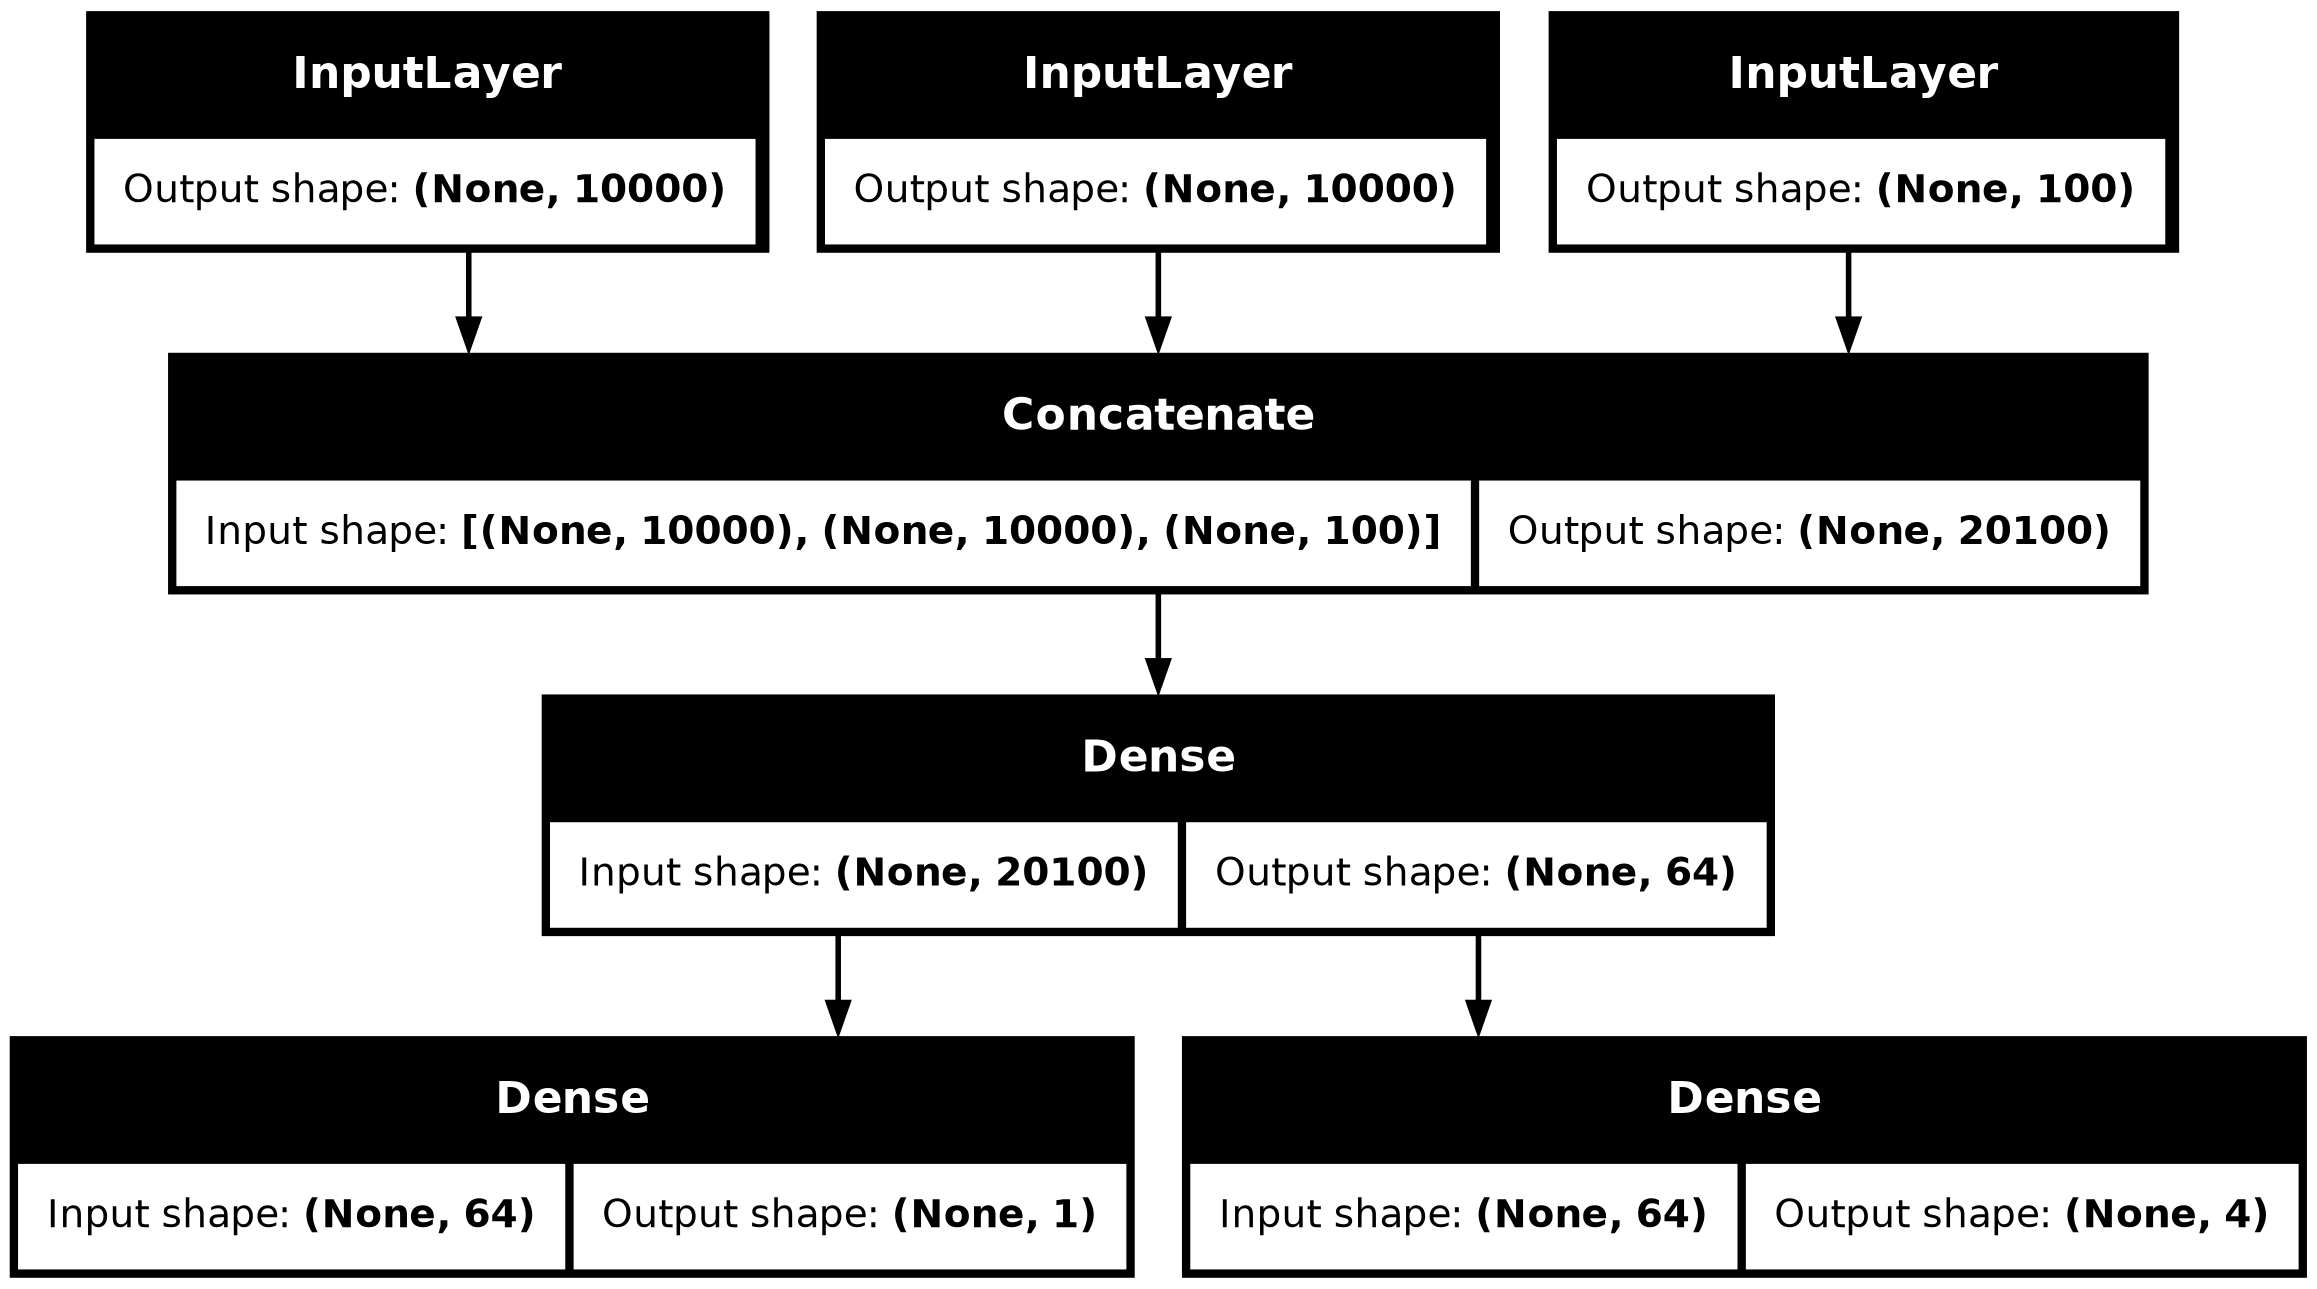

In [19]:
import os
PATH_PLOTS = '/mnt/0A2AAC152AABFBB7/sideProjects/deepLearning/images'
image_file = os.path.join(PATH_PLOTS, "updated_ticket_classifier.png")
keras.utils.plot_model(model, image_file, show_shapes=True)